# EGA substrates roughing

Computation of the sag difference between the roughed spheres (prior to polishing) and the nominal aspherical surfaces. Based on the aff-axis, radius and thickness parameters provided by Bertin.

SW SN3 
 dR=1.379 [mm] dx=-0.135 [mm] dy=-0.004 mm] dz=0.358 [mm]
SW SN4 
 dR=-1.011 [mm] dx=-0.023 [mm] dy=-0.071 mm] dz=0.178 [mm]
SW SN2 
 dR=1.429 [mm] dx=-0.058 [mm] dy=0.055 mm] dz=0.188 [mm]
SW SN1 
 dR=1.589 [mm] dx=-0.134 [mm] dy=0.046 mm] dz=0.048 [mm]
LW SN1 
 dR=-0.584 [mm] dx=-0.077 [mm] dy=0.026 mm] dz=0.197 [mm]
LW SN2 
 dR=-3.314 [mm] dx=0.069 [mm] dy=0.076 mm] dz=0.047 [mm]
LW SN3 
 dR=-2.254 [mm] dx=0.118 [mm] dy=-0.064 mm] dz=0.107 [mm]


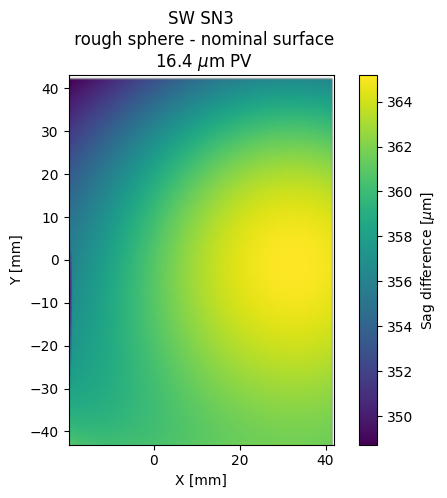

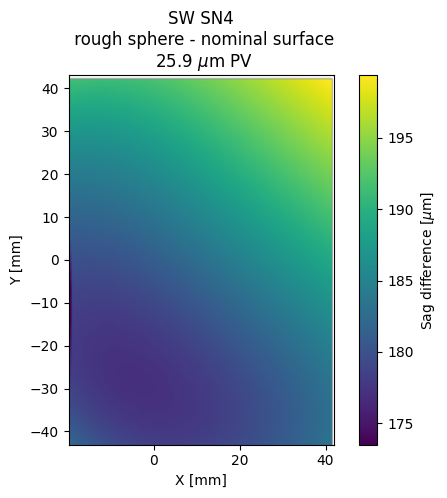

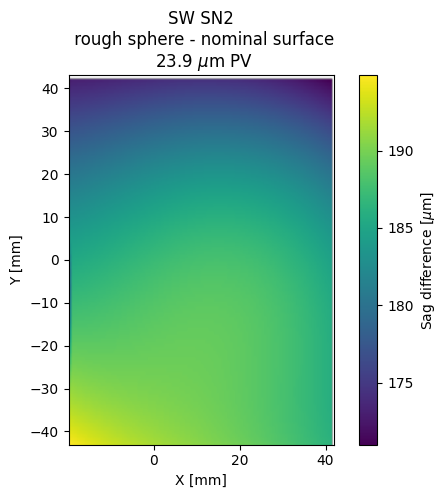

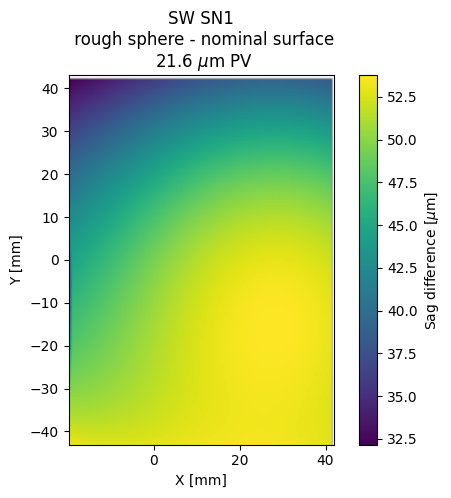

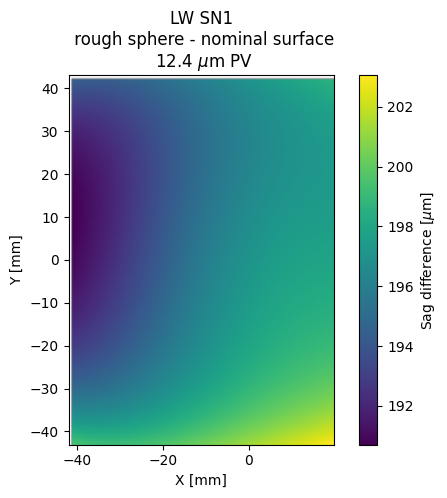

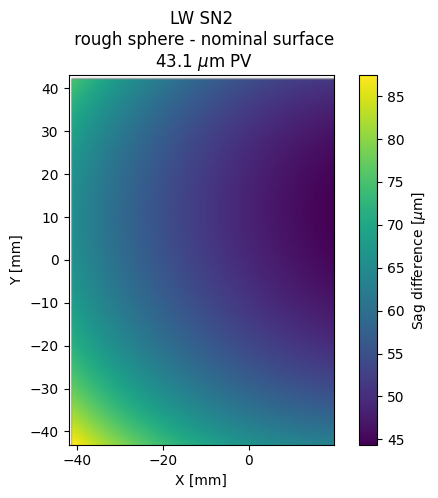

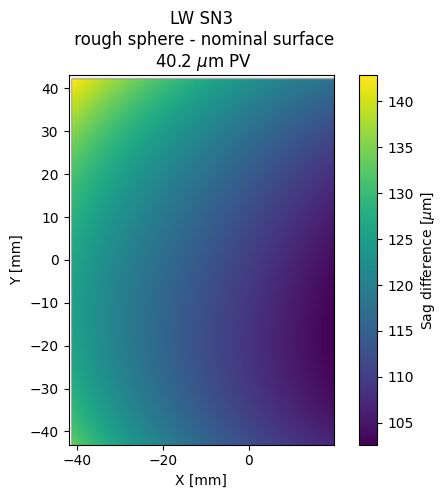

In [2]:
from optical import bertin_lw_sphericals, bertin_sw_sphericals, rectangular_lw_substrate, rectangular_sw_substrate
import matplotlib.pyplot as plt
import numpy as np

for substrate_type in ['SW', 'LW']:
    if substrate_type == 'LW':
        nominal = rectangular_lw_substrate
        sphericals = bertin_lw_sphericals
    else:
        nominal = rectangular_sw_substrate
        sphericals = bertin_sw_sphericals

    for spherical in sphericals:
        fig, ax = plt.subplots()
        difference = -1e3 * nominal.sag_from(spherical.surface)
        pv = np.nanmax(difference) - np.nanmin(difference)
        im = ax.imshow(difference, origin='lower', extent=nominal.limits)
        ax.set_xlabel('X [mm]')
        ax.set_ylabel('Y [mm]')
        ax.set_title(f'{spherical.name}\n rough sphere - nominal surface\n {pv:.1f} $\\mu$m PV')
        cb = fig.colorbar(im)
        cb.set_label(r"Sag difference [$\mu$m]")
        print(f'{spherical.name} \n dR={spherical.surface.r - nominal.best_sphere.r:.3f} [mm] '
              f'dx={spherical.surface.dx - nominal.best_sphere.dx:.3f} [mm] '
              f'dy={spherical.surface.dy - nominal.best_sphere.dy:.3f} mm] '
              f'dz={spherical.surface.sag((spherical.surface.dx, spherical.surface.dy)) - nominal.best_sphere.sag((nominal.best_sphere.dx, nominal.best_sphere.dy)):.3f} [mm]')
